In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from scipy.cluster import hierarchy

In [3]:
df = pd.read_pickle("data/data.pickle")
attributes_df = df.drop(columns=["coord_x", "coord_y", "region"])
attributes_df.head()

,color_white-wine,color_yellow,color_very-pale,color_pale,color_pale-gold,color_gold,color_old-gold,color_full-gold,color_bronze,color_pale-amber,...,finish_smoky,finish_sweet,finish_spicy,finish_oily,finish_salty,finish_aromatic,finish_quick,finish_long,finish_very-long,finish_lingering
name,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
def extract_cols_groups(columns):

    cols_groups = []

    for col in columns:
        start = col.split("_")[0]
        if start not in cols_groups:
            cols_groups.append(start)

    return cols_groups

In [5]:
def get_weighted_jaccard(df):
    dist_list = []
    
    cols_groups = extract_cols_groups(df.columns)
    for col in cols_groups:
        select_col = df.columns.str.startswith(col + "_")
        subset = df.loc(axis=1)[select_col]
        subset_dist = distance.pdist(subset, "jaccard")
        dist_list.append(subset_dist)
    
    return np.array(dist_list).mean(axis=0)

In [6]:
wg_dists = get_weighted_jaccard(attributes_df)

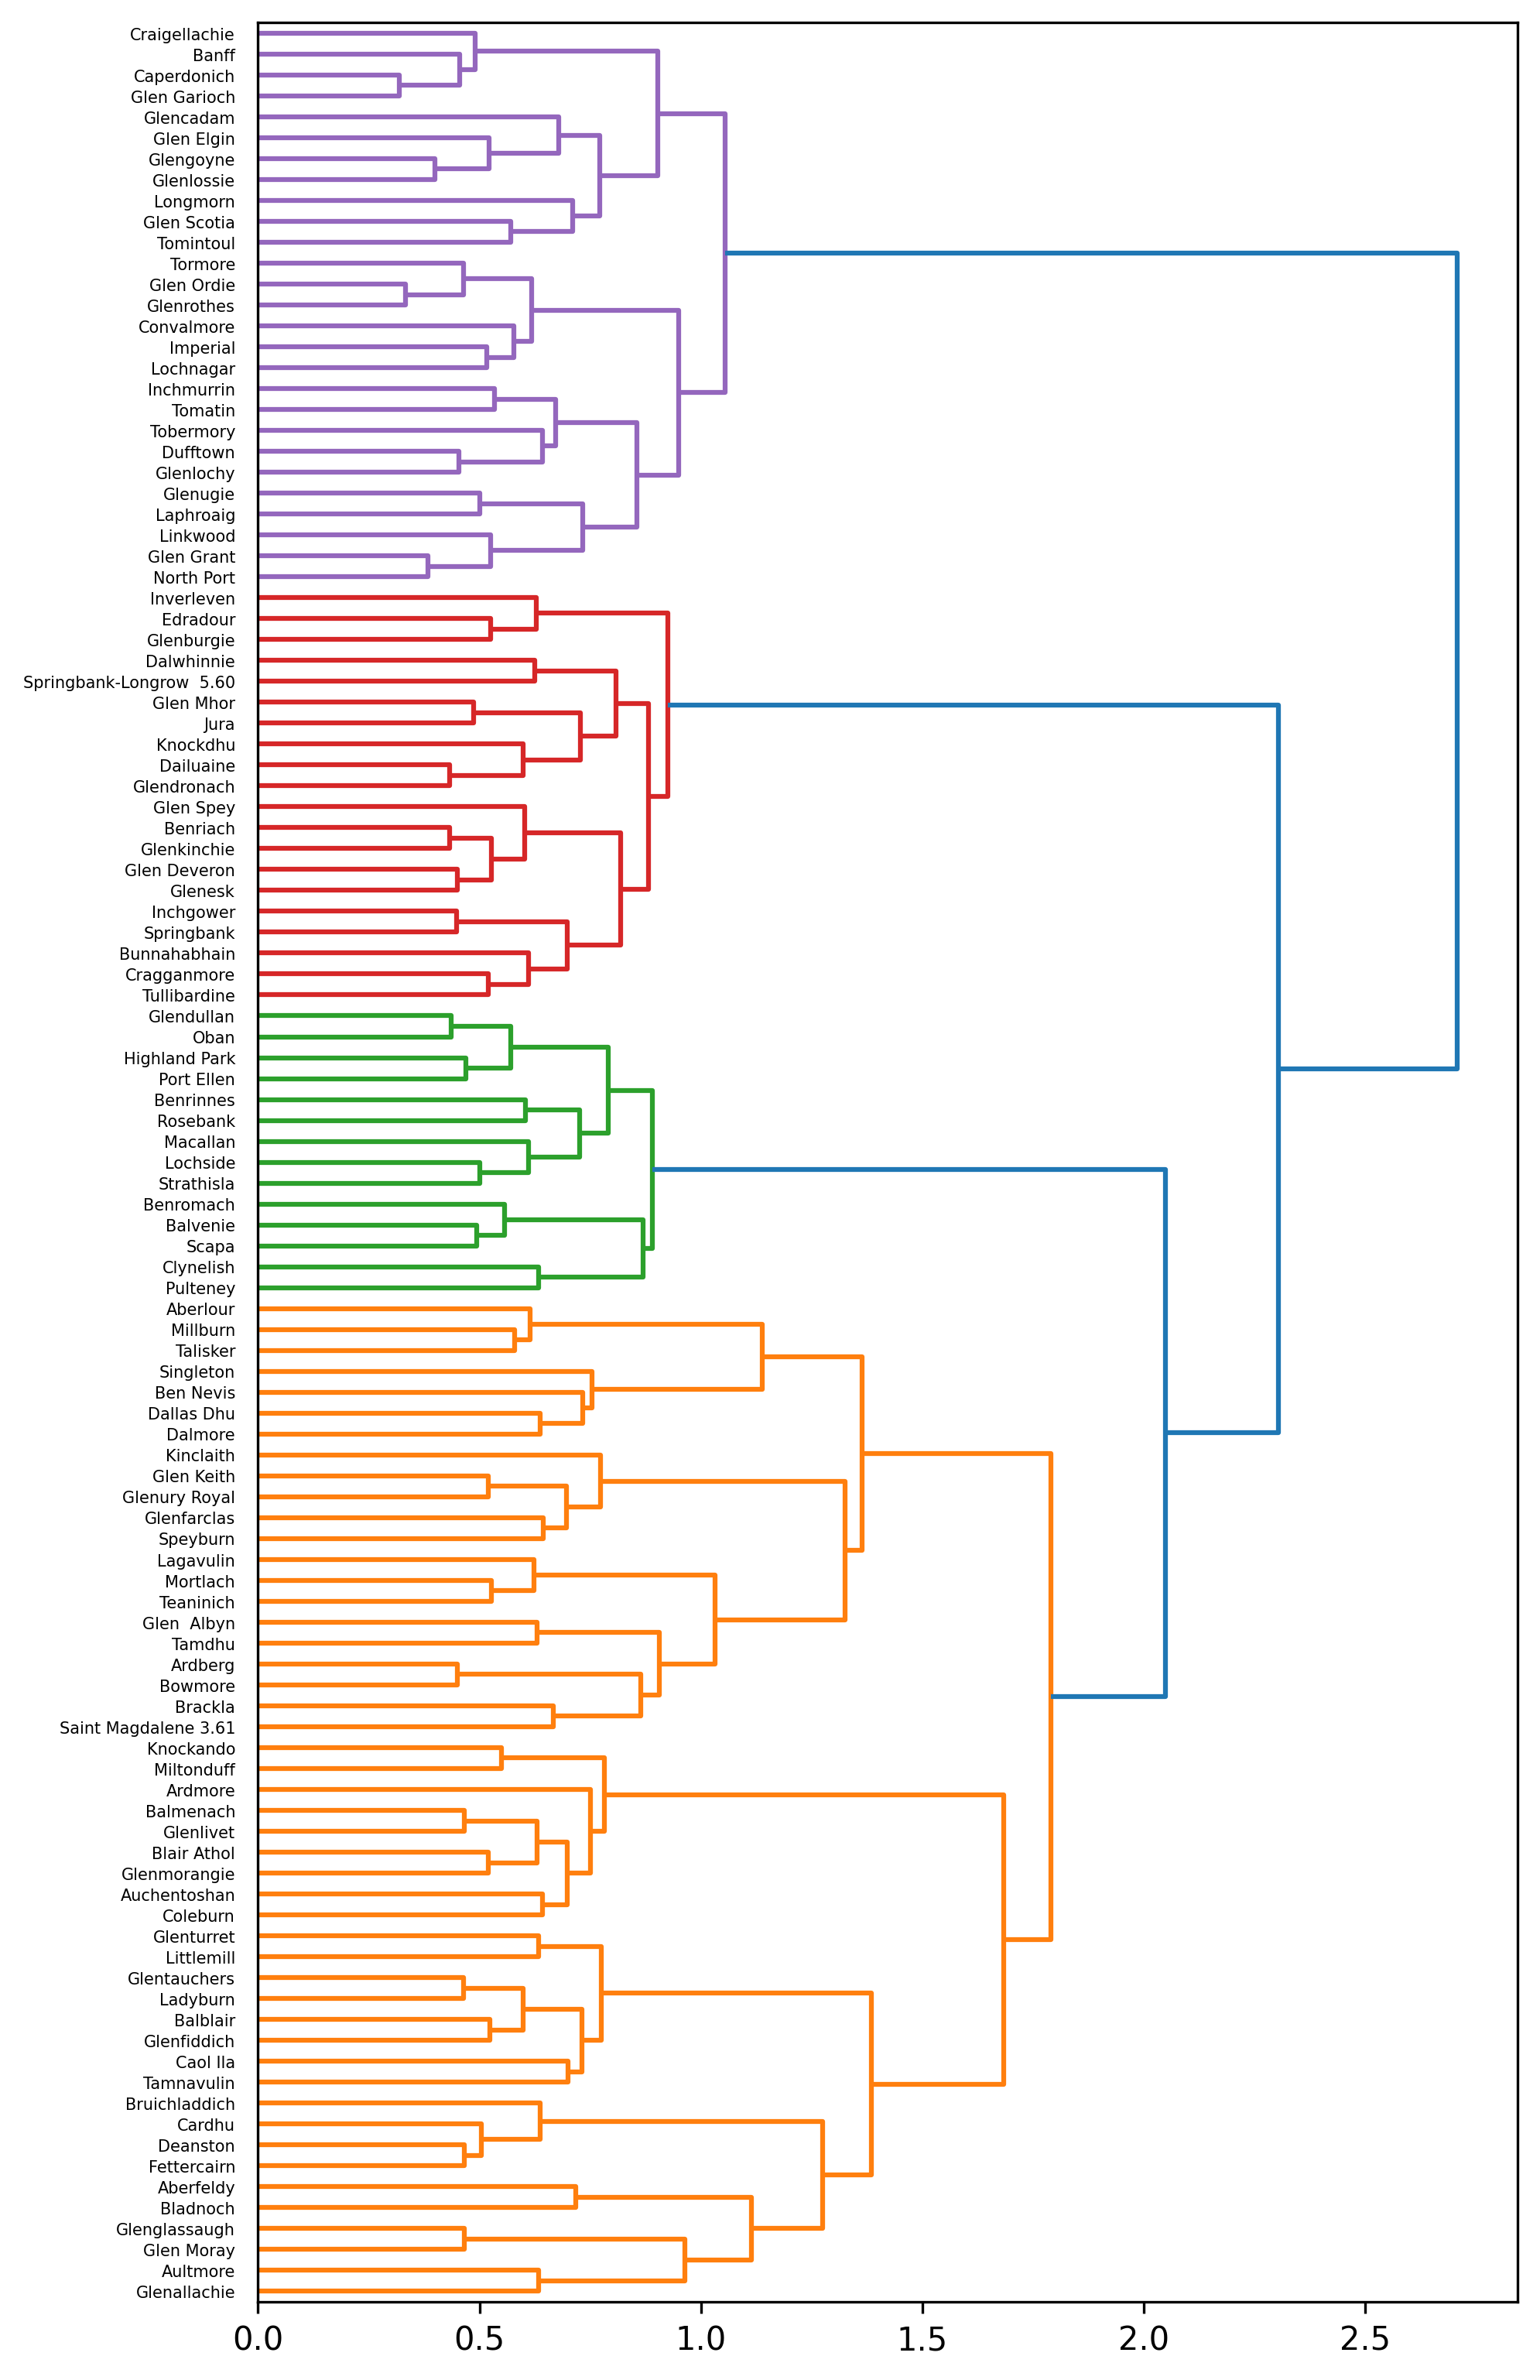

In [11]:
linkage_matrix = hierarchy.linkage(wg_dists, method="ward")

plt.figure(figsize=[7, 13], dpi=300)
hierarchy.dendrogram(linkage_matrix,
                     orientation="right",
                     labels=df.index,
                     distance_sort='descending')

plt.show()

In [12]:
n_clusters = 4
df['cluster_label'] = hierarchy.fcluster(linkage_matrix, 4, criterion='maxclust')
df['cluster_label'].value_counts()

4    48
1    27
2    20
3    14
Name: cluster_label, dtype: int64

In [25]:
cross_df = pd.crosstab(df['cluster_label'], df['region'])
cross_df.div(cross_df.sum(axis=0), axis=1)

region,Highlands,Islay,Lowlands
cluster_label,,,
1,0.280899,0.125,0.083333
2,0.168539,0.125,0.333333
3,0.134831,0.125,0.083333
4,0.415730,0.625,0.500000
